In [15]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries
from imageio.v2 import imread
from imageio import mimsave

In [2]:
# read images

nb_start = 1
nb_end   = 50

img_sequence = []
mask_true_sequence = []
mask_pred_sequence = []
mask_visualisation = []

for i in range(nb_start, nb_end+1):
    img = imread('./sequences-train/swan-' + str(i).zfill(3) +'.bmp')
    mask_true = imread("./sequences-train/swan-" + str(i).zfill(3) +'.png')
    mask_pred = imread("./my_results/swan-mask_pro"+ str(i).zfill(3) +'.png')

    img_sequence.append(img)
    mask_true_sequence.append(mask_true)
    mask_pred_sequence.append(mask_pred)
    mask_visualisation.append(mark_boundaries(mark_boundaries(img, mask_true, color=(0,1,0)), mask_pred, color=(1,0,0)))


In [11]:
def plot_images_in_rows(images, imgs_per_row=4):

    # Calculate number of rows and columns for subplots
    num_images = len(images)
    num_rows = (num_images + imgs_per_row-1) // imgs_per_row  # Round up to the nearest integer
    num_cols = min(num_images, imgs_per_row)

    # Create figure and subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, imgs_per_row*num_rows))

    # Flatten axes if only one row or column
    if num_rows == 1:
        axes = axes.reshape(1, -1)
    elif num_cols == 1:
        axes = axes.reshape(-1, 1)

    # Plot images
    for i, ax in enumerate(axes.flat):
        if i < num_images:
            ax.imshow(images[i])
            ax.set_title(f"Frame {i+1}")
            ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()

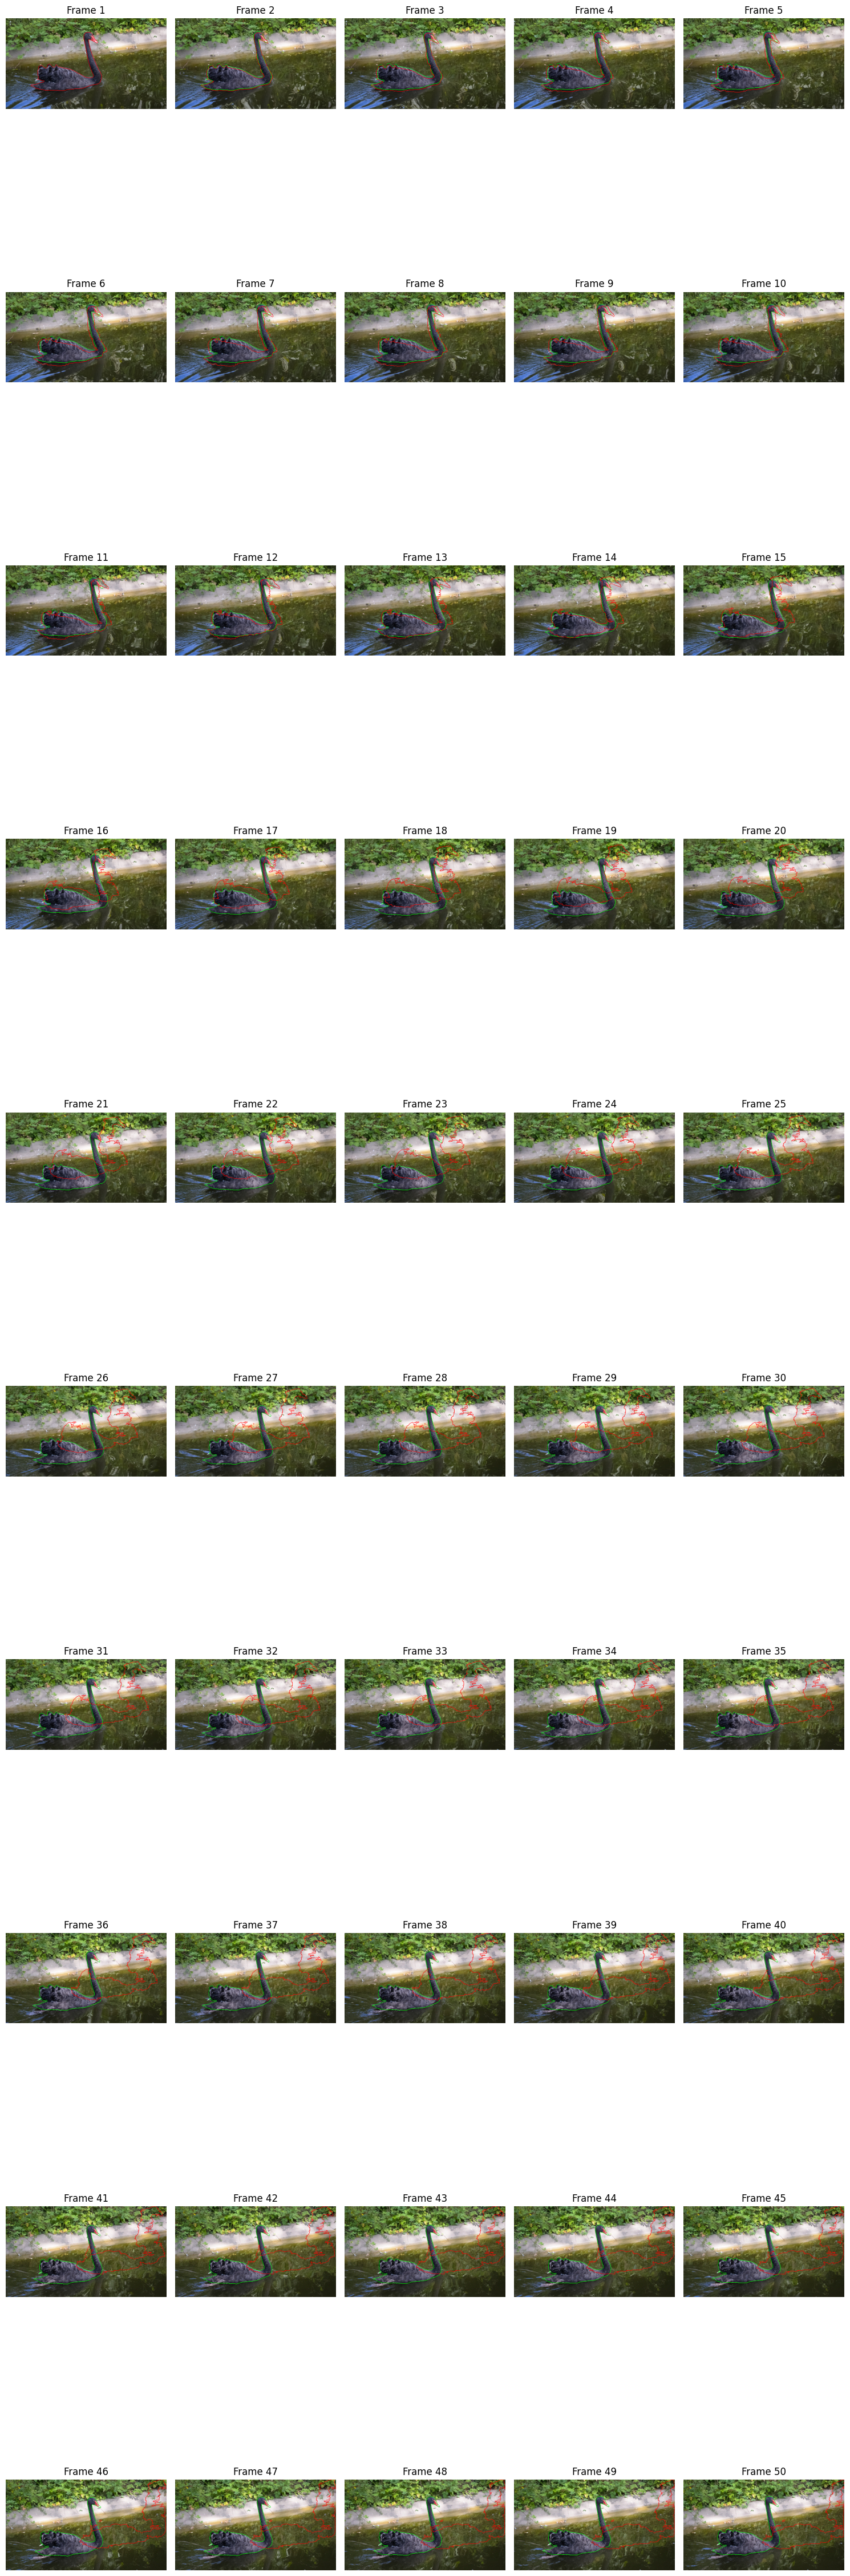

In [13]:
plot_images_in_rows(mask_visualisation, imgs_per_row=5)

In [23]:
# Create a list to store the images for the GIF
gif_images = []

# Iterate over each image in mask_visualisation and append to gif_images
for image in mask_visualisation:
    # Convert image to uint8 format
    image_uint8 = (image * 255).astype('uint8')
    gif_images.append(image_uint8)

# Save the GIF
mimsave('./my_results/mask_visualisation_swan.gif', gif_images, duration=3.0)  # Adjust duration as needed

